In [30]:
! wget https://github.com/caserec/Datasets-for-Recommneder-Systems/raw/master/Processed%20Datasets/AmazonMusic.tar.xz
! tar -xf AmazonMusic.tar.xz
! pip install caserecommender

--2019-09-04 20:48:25--  https://github.com/caserec/Datasets-for-Recommneder-Systems/raw/master/Processed%20Datasets/AmazonMusic.tar.xz
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/caserec/Datasets-for-Recommneder-Systems/master/Processed%20Datasets/AmazonMusic.tar.xz [following]
--2019-09-04 20:48:25--  https://raw.githubusercontent.com/caserec/Datasets-for-Recommneder-Systems/master/Processed%20Datasets/AmazonMusic.tar.xz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22112728 (21M) [application/octet-stream]
Saving to: ‘AmazonMusic.tar.xz.2’

AmazonMusic.tar.xz. 100%[===================>] 

In [31]:
ls

AmazonMusic/        AmazonMusic.tar.xz.1  map_tilte.npy  test.dat
AmazonMusic.tar.xz  AmazonMusic.tar.xz.2  sample_data/   train.dat


In [0]:
import pandas as pd
import numpy as np

In [33]:
dataset = pd.read_json('./AmazonMusic/Digital_Music_5.json', lines=True)
dataset.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,5555991584,"[3, 3]",5,"It's hard to believe ""Memory of Trees"" came ou...","09 12, 2006",A3EBHHCZO6V2A4,"Amaranth ""music fan""",Enya's last great album,1158019200
1,5555991584,"[0, 0]",5,"A clasically-styled and introverted album, Mem...","06 3, 2001",AZPWAXJG9OJXV,bethtexas,Enya at her most elegant,991526400
2,5555991584,"[2, 2]",5,I never thought Enya would reach the sublime h...,"07 14, 2003",A38IRL0X2T4DPF,bob turnley,The best so far,1058140800
3,5555991584,"[1, 1]",5,This is the third review of an irish album I w...,"05 3, 2000",A22IK3I6U76GX0,Calle,Ireland produces good music.,957312000
4,5555991584,"[1, 1]",4,"Enya, despite being a successful recording art...","01 17, 2008",A1AISPOIIHTHXX,"Cloud ""...""",4.5; music to dream to,1200528000


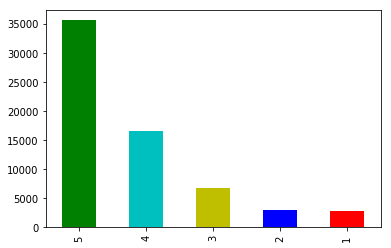

In [34]:
dataset.overall.value_counts().plot(kind='bar', color=['g', 'c', 'y', 'b', 'r']);

In [35]:
dataset_metadata = pd.read_csv('AmazonMusic/amazon_music_metadata.csv')
dataset_metadata.head()

,asin,title,Accessories,Acid Jazz,Acoustic Blues,Adult Alternative,Adult Contemporary,Africa,Afro Brazilian,Afro-Cuban,Air Tool Accessories,Album-Oriented Rock (AOR),Alt Industrial,Alt-Country & Americana,Alternative Medicine,Alternative Metal,Alternative Rock,Ambient,Ambient Pop,American Alternative,American Punk,Americana,Amplifiers & Effects,Andes,Arena Rock,Argentina,Arts & Crafts Supplies,"Arts, Crafts & Sewing",Australia & New Zealand,Austria,Avant Garde & Free Jazz,Baby Products,Bachata,Bags & Cases,Bakersfield Sound,Ballets,Ballets & Dances,Baroque Pop,Bass,Bass Guitars,...,Third Wave Ska,Thrash & Speed Metal,Tin Pan Alley,Tools & Accessories,Tools & Home Improvement,Traditional,Traditional Blues,Traditional British & Celtic Folk,Traditional Folk,Traditional Jazz & Ragtime,Traditional Pop,Traditional Vocal Pop,Trance,Tributes,Trim & Embellishments,Trip-Hop,Turkey,Turntablists,Twee Pop,Urban & Contemporary,Urban Folk,Uruguay,Venezuela,Vitamins & Dietary Supplements,Vocal Blues,Vocal Jazz,Vocal Non-Opera,Vocal Pop,Voices,Walkers,Wall Stickers,Wall Switches,Washers,Wave Washers & Wave Springs,Wedding Music,West Coast,West Coast Blues,Western Swing,World Dance,World Music
0,5555991584,Memory of Trees,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6308051551,Dont Drink His Blood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7901622466,On Fire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,B0000000ZW,Changing Faces,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,B00000016W,Pet Sounds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df_recsys = dataset[['reviewerID', 'asin', 'overall']] 
df_recsys.head()

,reviewerID,asin,overall
0,A3EBHHCZO6V2A4,5555991584,5
1,AZPWAXJG9OJXV,5555991584,5
2,A38IRL0X2T4DPF,5555991584,5
3,A22IK3I6U76GX0,5555991584,5
4,A1AISPOIIHTHXX,5555991584,4


In [0]:
df_recsys = df_recsys.merge(dataset_metadata[['asin', 'title']])

In [38]:
# unique users
df_recsys.reviewerID.unique()

array(['A3EBHHCZO6V2A4', 'AZPWAXJG9OJXV', 'A38IRL0X2T4DPF', ...,
       'A3IZB368BG43JS', 'A1TPW86OHXTXFC', 'AVSVOKDI0AGR7'], dtype=object)

In [39]:
# unique items
df_recsys.asin.unique()

array(['5555991584', 'B0000000ZW', 'B00000016T', ..., 'B000FBGBQ6',
       'B000FDEUI0', 'B000FDFRX2'], dtype=object)

In [40]:
df_recsys.tail()

,reviewerID,asin,overall,title
51791,A2LZJ5J9H862SN,B000FDFRX2,5,The Best Of Survivor
51792,A14W8HXP3RM3ZS,B000FDFRX2,3,The Best Of Survivor
51793,AIMMIYQCNGM24,B000FDFRX2,5,The Best Of Survivor
51794,AGGC3BHIG6A5K,B000FDFRX2,5,The Best Of Survivor
51795,A3464G00K8ZYD1,B000FDFRX2,5,The Best Of Survivor


### Map users and itens

In [0]:
map_users = {user: u_id for u_id, user in enumerate(df_recsys.reviewerID.unique())}
map_items = {item: i_id for i_id, item in enumerate(df_recsys.asin.unique())}

In [0]:
df_recsys['asin'] = df_recsys['asin'].map(map_items)
df_recsys['reviewerID'] = df_recsys['reviewerID'].map(map_users)

In [43]:
df_recsys.head()

,reviewerID,asin,overall,title
0,0,0,5,Memory of Trees
1,1,0,5,Memory of Trees
2,2,0,5,Memory of Trees
3,3,0,5,Memory of Trees
4,4,0,4,Memory of Trees


In [0]:
asin_title = {}

for idx, row in df_recsys.iterrows():
    asin_title[row['asin']] = row['title']
    
np.save('map_tilte.npy', asin_title)

### Divide dataset

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train, test = train_test_split(df_recsys, test_size=0.33, random_state=42)
train.to_csv('train.dat', index=False, header=False, sep='\t')
test.to_csv('test.dat', index=False, header=False, sep='\t')

In [47]:
ls -l

total 66312
drwxrwxr-x 2 1001 1001     4096 Sep  4 20:33 AmazonMusic/
-rw-r--r-- 1 root root 22112728 Sep  4 20:43 AmazonMusic.tar.xz
-rw-r--r-- 1 root root 22112728 Sep  4 20:46 AmazonMusic.tar.xz.1
-rw-r--r-- 1 root root 22112728 Sep  4 20:48 AmazonMusic.tar.xz.2
-rw-r--r-- 1 root root    74684 Sep  4 20:48 map_tilte.npy
drwxr-xr-x 1 root root     4096 Aug 27 16:17 sample_data/
-rw-r--r-- 1 root root   484253 Sep  4 20:48 test.dat
-rw-r--r-- 1 root root   985210 Sep  4 20:48 train.dat


# Case Recommender

You could also use:

> from caserec.utils.split_database import SplitDatabase

> SplitDatabase(input_file=dataset, dir_folds=dir_path, n_splits=10).k_fold_cross_validation()

### Rating Prediction

In [48]:
from caserec.recommenders.rating_prediction.most_popular import MostPopular

MostPopular('train.dat', 'test.dat', 'rp_mostPopular.dat').compute()

[Case Recommender: Rating Prediction > Most Popular]

train data:: 5036 users and 2581 items (34703 interactions) | sparsity:: 99.73%
test data:: 4508 users and 2493 items (17093 interactions) | sparsity:: 99.85%

prediction_time:: 0.349664 sec


Eval:: MAE: 0.744015 RMSE: 1.005638 


In [49]:
predictions = pd.read_csv('rp_mostPopular.dat', sep='\t', names=['reviewerID', 'asin', 'rate'])
predictions['title'] = predictions.asin.map(asin_title)
predictions.head()

,reviewerID,asin,rate,title
0,0,2471,3.777778,Jagged Little Pill Acoustic
1,0,1978,4.583333,La Revancha Del Tango
2,0,0,4.875000,Memory of Trees
3,1,1272,4.333333,Ani Difranco
4,1,667,4.833333,For the Roses


### Ranking

In [50]:
from caserec.recommenders.item_recommendation.most_popular import MostPopular

MostPopular('train.dat', 'test.dat', 'rank_mostPopular.dat').compute(as_table=True, metrics=['NDCG'])

[Case Recommender: Item Recommendation > Most Popular]

train data:: 5036 users and 2581 items (34703 interactions) | sparsity:: 99.73%
test data:: 4508 users and 2493 items (17093 interactions) | sparsity:: 99.85%

prediction_time:: 96.215000 sec


NDCG@1	NDCG@3	NDCG@5	NDCG@10	
0.019299	0.041359	0.051351	0.065469	


In [51]:
ranking = pd.read_csv('rank_mostPopular.dat', sep='\t', names=['reviewerID', 'asin', 'score'])
ranking['title'] = ranking.asin.map(asin_title)
ranking.head(10)

,reviewerID,asin,score,title
0,0,1770,596.0,The Marshall Mathers LP
1,0,2039,577.0,The Eminem Show [Limited Edition w/ Bonus DVD]
2,0,2133,551.0,Get Rich Or Die Tryin
3,0,169,511.0,All Eyez on Me
4,0,2212,510.0,Speakerboxxx/ The Love Below
5,0,992,509.0,Are You Experienced
6,0,2408,492.0,The Documentary
7,0,1665,480.0,Toxicity
8,0,1955,470.0,Blueprint
9,0,459,467.0,Thriller


In [52]:
train[train.reviewerID == 0]

,reviewerID,asin,overall,title
18167,0,959,5,Ray of Light
19290,0,1011,5,Axis
27005,0,1523,5,Experience Hendrix
37443,0,2014,2,Come Away with Me
